In [3]:
# https://github.com/jin-s13/COCO-WholeBody
# https://cocodataset.org/#download
# https://cocodataset.org/#keypoints-2017

In [ ]:
"""
Sources

https://github.com/nicknochnack/FaceDetection/blob/main/FaceDetection.ipynb
https://towardsdatascience.com/bounding-box-prediction-from-scratch-using-pytorch-a8525da51ddc

http://shuoyang1213.me/WIDERFACE/
https://github.com/jin-s13/COCO-WholeBody/blob/master/data_format.md

"""

In [29]:

l_pair = [
    (0, 1), (0, 2), (1, 3), (2, 4),  # Head
    (5, 18), (6, 18), (5, 7), (7, 9), (6, 8), (8, 10),# Body
    (17, 18), (18, 19), (19, 11), (19, 12),
    (11, 13), (12, 14), (13, 15), (14, 16),
    (20, 24), (21, 25), (23, 25), (22, 24), (15, 24), (16, 25),# Foot
    (26, 27),(27, 28),(28, 29),(29, 30),(30, 31),(31, 32),(32, 33),(33, 34),(34, 35),(35, 36),(36, 37),(37, 38),#Face
    (38, 39),(39, 40),(40, 41),(41, 42),(43, 44),(44, 45),(45, 46),(46, 47),(48, 49),(49, 50),(50, 51),(51, 52),#Face
    (53, 54),(54, 55),(55, 56),(57, 58),(58, 59),(59, 60),(60, 61),(62, 63),(63, 64),(64, 65),(65, 66),(66, 67),#Face
    (68, 69),(69, 70),(70, 71),(71, 72),(72, 73),(74, 75),(75, 76),(76, 77),(77, 78),(78, 79),(79, 80),(80, 81),#Face
    (81, 82),(82, 83),(83, 84),(84, 85),(85, 86),(86, 87),(87, 88),(88, 89),(89, 90),(90, 91),(91, 92),(92, 93),#Face
    (94,95),(95,96),(96,97),(97,98),(94,99),(99,100),(100,101),(101,102),(94,103),(103,104),(104,105),#LeftHand
    (105,106),(94,107),(107,108),(108,109),(109,110),(94,111),(111,112),(112,113),(113,114),#LeftHand
    (115,116),(116,117),(117,118),(118,119),(115,120),(120,121),(121,122),(122,123),(115,124),(124,125),#RightHand
    (125,126),(126,127),(115,128),(128,129),(129,130),(130,131),(115,132),(132,133),(133,134),(134,135)#RightHand
]
p_color = [(0, 255, 255), (0, 191, 255), (0, 255, 102), (0, 77, 255), (0, 255, 0),  # Nose, LEye, REye, LEar, REar
           (77, 255, 255), (77, 255, 204), (77, 204, 255), (191, 255, 77), (77, 191, 255), (191, 255, 77),  # LShoulder, RShoulder, LElbow, RElbow, LWrist, RWrist
           (204, 77, 255), (77, 255, 204), (191, 77, 255), (77, 255, 191), (127, 77, 255), (77, 255, 127),  # LHip, RHip, LKnee, Rknee, LAnkle, RAnkle, Neck
           (77, 255, 255), (0, 255, 255), (77, 204, 255),  # head, neck, shoulder
           (0, 255, 255), (0, 191, 255), (0, 255, 102), (0, 77, 255), (0, 255, 0), (77, 255, 255)] # foot

line_color = [(0, 215, 255), (0, 255, 204), (0, 134, 255), (0, 255, 50),
              (0, 255, 102), (77, 255, 222), (77, 196, 255), (77, 135, 255), (191, 255, 77), (77, 255, 77),
              (77, 191, 255), (204, 77, 255), (77, 222, 255), (255, 156, 127),
              (0, 127, 255), (255, 127, 77), (0, 77, 255), (255, 77, 36), 
              (0, 77, 255), (0, 77, 255), (0, 77, 255), (0, 77, 255), (255, 156, 127), (255, 156, 127)]


In [30]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import cv2
from tqdm import tqdm

from PIL import Image

from NotebookNotifications.Notifications import notify

In [34]:
image_folder = "data/hico_20160224_det/images/train2015/"
save_folder = 'results/visualizations/'

In [22]:
f = open("data/halpe_train_v1.json")
annotations = json.load(f)

In [32]:
imgs = {}
for img in annotations['images']:
    imgs[img['id']] = img

In [35]:
for idx, annot in tqdm(enumerate(annotations['annotations'])):
    if 50 < idx:
        break
    if 'keypoints' in annot and type(annot['keypoints']) == list:
        imgname = str(imgs[annot['image_id']]['file_name'])
        
        if os.path.exists(os.path.join(save_folder, imgname)):
            img = cv2.imread(os.path.join(save_folder, imgname))
        else:
            img = cv2.imread(os.path.join(image_folder, imgname))
        part_line = {}
        kp = np.array(annot['keypoints'])
        kp_x = kp[0::3]
        kp_y = kp[1::3]
        kp_scores = kp[2::3]
        
        # Draw keypoints
        for n in range(kp_scores.shape[0]):
            if kp_scores[n] <= 0.6:
                continue
            cor_x, cor_y = int(kp_x[n]), int(kp_y[n])
            part_line[n] = (int(cor_x), int(cor_y))
            if n < len(p_color):
                cv2.circle(img, (int(cor_x), int(cor_y)), 2, p_color[n], -1)
            else:
                cv2.circle(img, (int(cor_x), int(cor_y)), 1, (255,255,255), 2)
        # Draw limbs
        for i, (start_p, end_p) in enumerate(l_pair):
            if start_p in part_line and end_p in part_line:
                start_xy = part_line[start_p]
                end_xy = part_line[end_p]
                if i < len(line_color):
                    cv2.line(img, start_xy, end_xy, line_color[i], 2)
                else:
                    cv2.line(img, start_xy, end_xy, (255,255,255), 1)

        cv2.imwrite(os.path.join(save_folder,imgname),img)

51it [00:00, 273.55it/s]


In [4]:
# Read ids of train and validataion data
train_path = "data/coco_wholebody_train_v1.0.json"
test_path = "data/coco_wholebody_val_v1.0.json"

f = open(train_path)
train_dict = json.load(f)

f = open(test_path)
test_dict = json.load(f)

print(list(train_dict))
notify("Loaded data")

['info', 'licenses', 'images', 'annotations', 'categories']


000000374628.jpg
374628


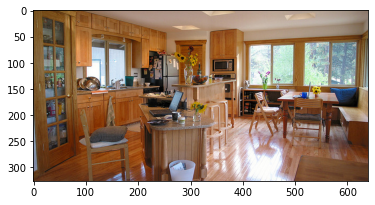

In [66]:
id = 15
im_data = train_dict['images'][id]

file_name = im_data['file_name']

print(file_name)
print(im_data['id'])

plt.imshow(plt.imread("data/train2017/" + file_name))
plt.show()


In [67]:
a = None

for anno in train_dict['annotations']:
    if anno['image_id'] == im_data['id']:
        print("Found")
        a = anno
        print(a['face_box'])

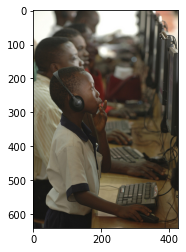

In [31]:
fig, ax = plt.subplots()

im = plt.imread("data/train2017/000000554625.jpg")

rect = patches.Rectangle((50, 100), 40, 30, linewidth=1, edgecolor='r', facecolor='none')

ax.imshow(im)
plt.show()

In [20]:
a['face_box']

[483.21, 69.79, 124.40000000000003, 106.2]

In [6]:
train_dict['annotations'][0]

{'segmentation': [[267.03,
   243.78,
   314.59,
   154.05,
   357.84,
   136.76,
   374.05,
   104.32,
   410.81,
   110.81,
   429.19,
   131.35,
   420.54,
   165.95,
   451.89,
   209.19,
   464.86,
   240.54,
   480,
   253.51,
   484.32,
   263.24,
   496.22,
   271.89,
   484.32,
   278.38,
   438.92,
   257.84,
   401.08,
   216.76,
   370.81,
   247.03,
   414.05,
   277.3,
   433.51,
   304.32,
   443.24,
   323.78,
   400,
   362.7,
   376.22,
   375.68,
   400,
   418.92,
   394.59,
   424.32,
   337.3,
   382.16,
   337.3,
   371.35,
   388.11,
   327.03,
   341.62,
   301.08,
   311.35,
   276.22,
   304.86,
   263.24,
   294.05,
   249.19]],
 'num_keypoints': 8,
 'area': 28292.08625,
 'iscrowd': 0,
 'keypoints': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  325,
  160,
  2,
  398,
  177,
  2,
  0,
  0,
  0,
  437,
  238,
  2,
  0,
  0,
  0,
  477,
  270,
  2,
  287,
  255,
  1,
  339,
  267,
  2,
  0,
  0,
  0,
  423,
  314,
  2,
  0,
  0,
 

In [23]:
# Get the ids of the images in the train and test (dont use all 100k)
N_train = 1000
N_test = 500

train_ids = [im['id'] for im in train_dict["images"][:N_train]]
train_paths = [im['file_name'] for im in train_dict["images"][:N_train]]

test_ids = [im['id'] for im in test_dict["images"][:N_test]]
test_paths = [im['file_name'] for im in test_dict["images"][:N_test]]

In [24]:
# Read the images (X)
X_train = [np.asarray(Image.open("data/train2017/" + name)) for name in train_paths]
X_test = [np.asarray(Image.open("data/val2017/" + name)) for name in test_paths]

X_train = np.array(X_train, dtype="object")
X_test = np.array(X_test, dtype="object")


# Read the annotations (y)
y_train = [im['face_box'] for im in train_dict['annotations'] if im['image_id'] in train_ids]
y_test = [im['face_box'] for im in test_dict['annotations'] if im['image_id'] in test_ids]

y_train = np.array(y_train, dtype="object")
y_test = np.array(y_test, dtype="object")

SyntaxError: invalid syntax (3380877995.py, line 10)

In [6]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (1000,)
X_test: (500,)
y_train: (1969, 4)
y_test: (961, 4)


In [7]:
anno_ids = [im['id'] for im in train_dict['annotations']]

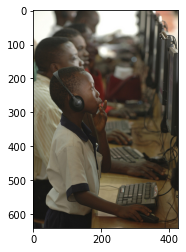

In [20]:
plt.imshow(X_train[4])

In [15]:
for i in y_train:
    print(i)

[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[240.98 360.25 19.159999999999997 21.74000000000001]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[235.6 106.59 31.07000000000002 26.75]
[0.0 0.0 0.0 0.0]
[196.77 173.97 16.69999999999999 15.560000000000002]
[0.0 0.0 0.0 0.0]
[262.03 169.72 28.660000000000025 29.05000000000001]
[325.66 238.9 64.41999999999996 61.51000000000002]
[274.99 96.91 49.70999999999998 49.71000000000001]
[0.0 0.0 0.0 0.0]
[377.02 106.3 37.98000000000002 42.06000000000002]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[277.13 63.75 39.69999999999999 44.260000000000005]
[188.21 129.04 13.620000000000005 16.310000000000002]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[205.84 87.09 22.590000000000003 22.349999999999994]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0]
[381

In [24]:
train_ids[1] in anno_ids

False

In [10]:
annotations = [(x['id'], x['face_box']) for x in train_dict['annotations']]

In [1]:
notify()

NameError: name 'notify' is not defined